Importing Necessary Libraries

In [1]:
#IMPORTING NECESSARY LIBRARIES
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math as m 

Data Collection & Loading

In [2]:
#Loading Datasets - Importing a CSV File into a Pandas DataFrame
vgsales = pd.read_csv('/Users/brian/Coding/Potential DB/archive/vgsales.csv')

In [3]:
#REVIEWING VIDEO GAME SALES DATASET 
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#SPOT CHECKING DATA
vgsales.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5086,5088,ESPN: Sports Connection,WiiU,2012.0,Sports,Ubisoft,0.21,0.12,0.00,0.04,0.37
12258,12260,Desert Strike Advance,GBA,2002.0,Simulation,Electronic Arts,0.05,0.02,0.00,0.00,0.06
7235,7237,NBA Jam Extreme,PS,1996.0,Sports,Acclaim Entertainment,0.12,0.08,0.00,0.01,0.22
1019,1021,Sonic Colors,Wii,2010.0,Platform,Sega,0.96,0.61,0.01,0.16,1.74
11264,11266,Natural Doctrine,PSV,2014.0,Role-Playing,Nippon Ichi Software,0.03,0.02,0.03,0.01,0.08


In [5]:
#INFORMATION CHECKS
vgsales.shape

(16598, 11)

Data Exploration, Cleaning and Brief Analysis

In [6]:
#MORE INDEPTH LOOK AT INFORMATION IN VIDEO GAME SALES DATASET - CHECKING FOR ANY OUTLIERS INITIALLY.
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [7]:
#REVIEWING DATA TYPES AND COLUMN NAMES
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
#IS THERE ANY COLUMNS THAT HAVE MISSING VALUES? 
vgsales.isnull().any()

Rank            False
Name            False
Platform        False
Year             True
Genre           False
Publisher        True
NA_Sales        False
EU_Sales        False
JP_Sales        False
Other_Sales     False
Global_Sales    False
dtype: bool

In [9]:
#CHECKING WHAT PERCENTAGE OF THE VALUES ARE MISSING TO DECIDE HOW TO PROCEED WITH DATA
(vgsales.isna().sum()*100) / vgsales.shape[0]

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [10]:
#GETTING THE FIGURES FOR MISSING INFORMATION
vgsales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [11]:
#UPON REVIEWING - A LOT OF INCOMPLETE DATA FROM 2015 ONWARDS, WILL DROP THIS DATA. 
#ALSO FOR THIS ANALYSIS WOULD LIKE TO REVIEW MORE MODERN GAMES AND GAMES THAT WILL LINE UP WITH OTHER DATASETS THAT WILL BE INTROUCED - RESTRICTING DATASET FROM 2000 - 2015.
vgsales.drop(vgsales[vgsales['Year'] > 2015].index, inplace = True) 
vgsales.drop(vgsales[vgsales['Year'] < 2000].index, inplace = True)

In [12]:
vgsales.shape

(14276, 11)

In [13]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        56
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [14]:
#FILLING MISSING INFORMATION WITH 0 - MAINLY FOR PUBLISHERS, WILL REMOVE YEARS CONTAINING 0 BELOW. 
vgsales = vgsales.fillna(0)

In [15]:
#REMOVING ENTRIES WITH NULL/0 VALUES IN YEAR COLUMN.
vgsales.drop(vgsales[vgsales['Year'] == 0].index, inplace = True)

In [16]:
#CHECKING TO ENSURE NO MORE NULL VALUES. 
vgsales.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [17]:
#CONVERTING THE FLOAT TYPES OF THE 'Year' COLUMN INTO INTEGERS - HAD TO REMOVE NULL VALUES BEFORE THIS WAS POSSIBLE.
vgsales['Year'] = vgsales['Year'].astype('int') 

In [18]:
#CHECKING FOR DUPLICATED ENTRIES
vgsales.duplicated().sum()

0

In [19]:
#REVIEWING RANDOM ENTRIES FROM DATASET TO SPOT CHECK DATA IS WITHIN YEAR RANGE 
vgsales.sample(15)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
13960,13962,The Sum of All Fears,GBA,2002,Shooter,Ubisoft,0.03,0.01,0.00,0.00,0.04
8112,8114,The Adventures of Cookie & Cream,PS2,2000,Puzzle,Empire Interactive,0.09,0.07,0.00,0.02,0.18
6223,6225,Madagascar,XB,2005,Platform,Activision,0.21,0.06,0.00,0.01,0.28
12774,12776,ESPN International Winter Sports 2002,PS2,2002,Sports,Konami Digital Entertainment,0.03,0.02,0.00,0.01,0.06
6530,6532,Muramasa: The Demon Blade,PSV,2013,Role-Playing,Marvelous Entertainment,0.13,0.00,0.10,0.03,0.26
10750,10752,Disney Sing It! High School Musical 3: Senior ...,X360,2009,Misc,Disney Interactive Studios,0.09,0.00,0.00,0.01,0.10
226,227,Animal Crossing: City Folk,Wii,2008,Simulation,Nintendo,1.87,1.12,1.32,0.37,4.68
947,949,Just Cause 3,PS4,2015,Action,Square Enix,0.46,1.02,0.07,0.28,1.83
3448,3450,Romancing SaGa,PS2,2005,Role-Playing,Square Enix,0.06,0.04,0.47,0.01,0.58
2130,2132,NCAA Football 06,XB,2005,Sports,Electronic Arts,0.73,0.21,0.00,0.03,0.97


In [20]:
#CHECKING THE NUMBER OF GAMES, UNIQUE PUBLISHERS, PLATFORMS AND GENRES TO GET AN IDEA OF HOW THE GAMES IN THE DATASET ARE DISTRIBUTED CATEGORICALLY
print("Number of Games: ", len(vgsales))
publishers = vgsales['Publisher'].unique()
print("Number of Publishers: ", len(publishers))
platforms = vgsales['Platform'].unique()
print("Number of Platforms: ", len(platforms))
genres = vgsales['Genre'].unique()
print("Number of Genres: ", len(genres))

Number of Games:  14005
Number of Publishers:  446
Number of Platforms:  20
Number of Genres:  12


Data Visualisation

In [21]:
vgsales.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7222,7224,Teenage Mutant Ninja Turtles: Danger of the Ooze,X360,2014,Adventure,Activision,0.11,0.09,0.00,0.02,0.22
9026,9028,G.I. Joe: The Rise of Cobra,PS2,2009,Action,Electronic Arts,0.11,0.00,0.00,0.03,0.14
8576,8578,Major League Baseball 2K11,Wii,2011,Sports,Take-Two Interactive,0.15,0.00,0.00,0.01,0.16
15109,15112,Grey's Anatomy: The Video Game,PC,2009,Adventure,Ubisoft,0.00,0.02,0.00,0.00,0.02
1053,1055,Kirby's Return to Dreamland,Wii,2011,Platform,Nintendo,0.62,0.21,0.79,0.08,1.70


In [22]:
#LETS START BY LOOKING AT GLOBAL SALES PER YEAR
vgsales_year = vgsales.groupby(by=['Year'])['Global_Sales'].sum()
vgsales_year  = vgsales_year.reset_index()
vgsales_year.sort_values(by=['Global_Sales'], ascending=False)

,Year,Global_Sales
8,2008,678.90
9,2009,667.30
7,2007,611.13
10,2010,600.45
6,2006,521.04
11,2011,515.99
5,2005,459.94
4,2004,419.31
2,2002,395.52
13,2013,368.11


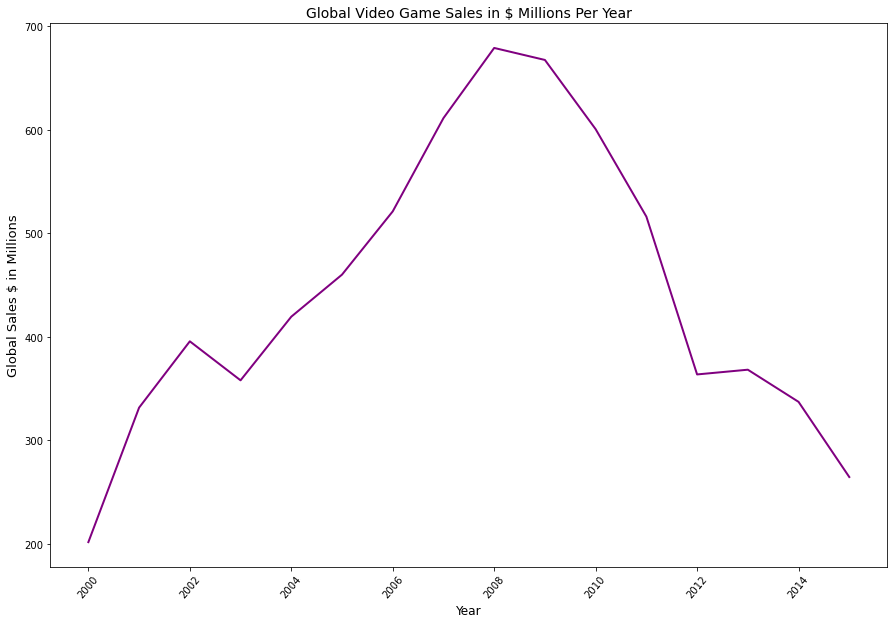

In [23]:
#PLOTTING SALES PER YEAR AND LOOKING AT TRAJECTORY:
plt.figure(figsize=(15, 10))
fig1 = sns.lineplot(x="Year", y="Global_Sales",  data=vgsales_year, color = 'purple', linewidth=2)
fig1.set_title('Global Video Game Sales in $ Millions Per Year', fontsize = 14)
fig1.set_xlabel('Year', fontsize = 12)
fig1.set_ylabel('Global Sales $ in Millions', fontsize = 13)
plt.xticks(rotation=50)
plt.show()

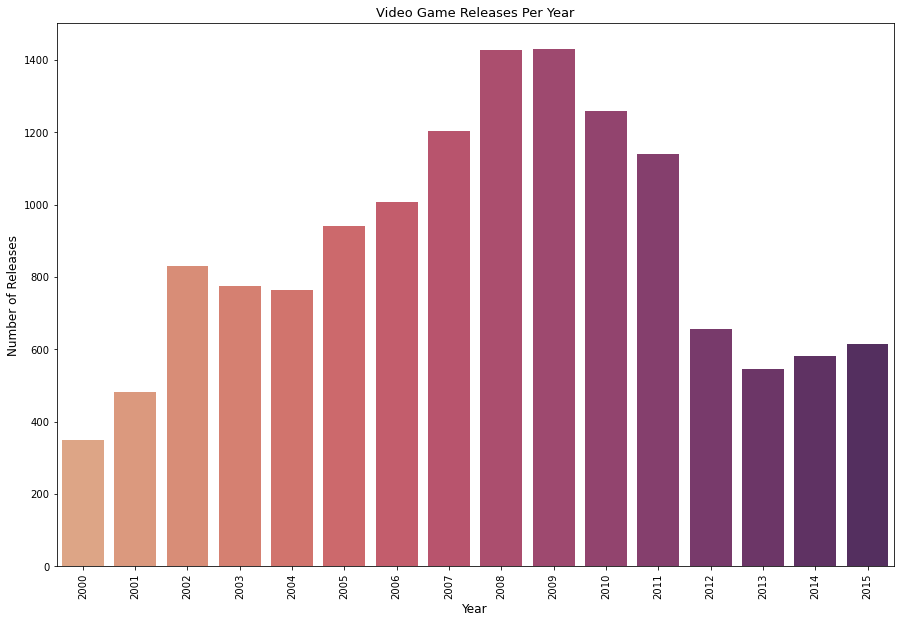

In [24]:
#WE CAN SEE THAT SALES PEAKED IN 2008 AND HAVE STEADILY DROPPED SINCE
#LETS SEE HOW MANY GAMES WERE RELEASED EACH YEAR AND SEE IF THERE IS A CORRELATION 

plt.figure(figsize=(15,10))
fig2 = sns.countplot(x='Year', data=vgsales, order=vgsales.groupby(by=['Year'])['Name'].count().index, palette="flare")
fig2.set_xlabel(xlabel='Year', fontsize=12)
fig2.set_ylabel(ylabel='Number of Releases', fontsize=12)
fig2.set_title(label='Video Game Releases Per Year', fontsize=13)
plt.xticks(rotation=90)
plt.show()

#2009 = 1431
#2008 = 1428
#2010 = 1259 
#2011 = 1139

In [25]:
#DISTRIBUTION OF GLOBAL SALES BETWEEN OUR REGIONS
top_sale_reg = vgsales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "Region", 0: "Sales"})
top_sale_reg



,Region,Sales
0,NA_Sales,3498.73
1,EU_Sales,2068.29
2,JP_Sales,795.73
3,Other_Sales,726.69


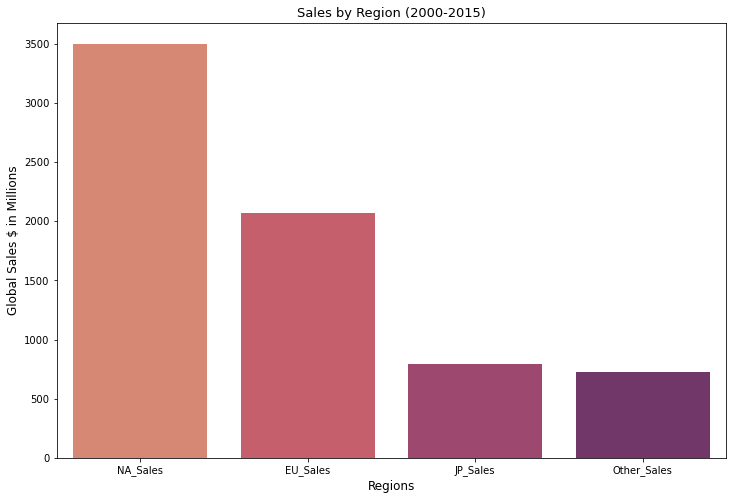

In [26]:

plt.figure(figsize=(12, 8))
fig3 = sns.barplot(x='Region', y='Sales', data = top_sale_reg, palette="flare")
fig3.set_title('Sales by Region (2000-2015)', fontsize=13)
fig3.set_xlabel(xlabel='Regions', fontsize=12)
fig3.set_ylabel(ylabel='Global Sales $ in Millions', fontsize=12)
plt.show()

WHICH GENRE GAME HAD THE HIGHEST SALES GLOBALLY? 

In [27]:
#OVERVIEW OF GLOBAL SALES BASED ON GENRE
data_genre = vgsales.groupby(by=['Genre'])['Global_Sales'].sum()
data_genre = data_genre.reset_index()
data_genre = data_genre.sort_values(by=['Global_Sales'], ascending=False)
data_genre

,Genre,Global_Sales
0,Action,1512.49
10,Sports,1115.79
8,Shooter,879.24
3,Misc,724.46
7,Role-Playing,717.27
6,Racing,562.63
4,Platform,495.90
9,Simulation,336.92
2,Fighting,309.50
1,Adventure,183.40


In [28]:
#REVIEWING NUMBER OF SALES BY REGION BASED GROUPED BY GENRE
comp_genre = vgsales[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_map = comp_genre.groupby(by=['Genre']).sum()
comp_map


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,745.03,465.71,124.95,175.95
Adventure,82.34,49.70,36.14,14.99
Fighting,159.41,74.36,44.12,31.59
Misc,367.97,199.84,84.27,71.83
Platform,258.31,140.41,55.10,41.79
Puzzle,65.03,40.50,24.18,10.29
Racing,272.05,192.71,27.71,69.97
Role-Playing,277.37,153.74,234.94,51.04
Shooter,478.12,282.25,22.17,96.32


In [29]:
comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_table, id_vars=['Genre'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

,Genre,Sale_Area,Sale_Price
0,Action,NA_Sales,745.03
1,Adventure,NA_Sales,82.34
2,Fighting,NA_Sales,159.41
3,Misc,NA_Sales,367.97
4,Platform,NA_Sales,258.31


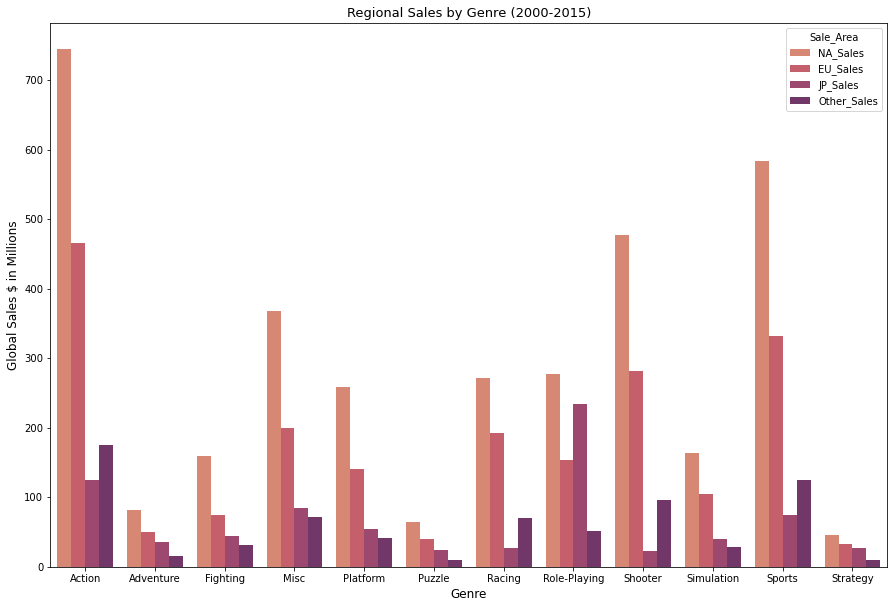

In [30]:

#VISUALISING THE SALES BASED ON GENRE PER REGION 
plt.figure(figsize=(15, 10))
fig4 = sns.barplot(x='Genre', y='Sale_Price', hue='Sale_Area', data=comp_table, palette="flare")
fig4.set_title('Regional Sales by Genre (2000-2015)', fontsize=13)
fig4.set_xlabel(xlabel='Genre', fontsize=12)
fig4.set_ylabel(ylabel='Global Sales $ in Millions', fontsize=12)
plt.show()



In [31]:
#LOOKING FOR CORRELATION BETWEEN HIGHEST SALES AND THE VOLUME OF GAMES RELEASED
genre_frequency = pd.DataFrame(vgsales['Genre'].value_counts(ascending=False))
genre_frequency

,Genre
Action,2905
Sports,1939
Misc,1568
Role-Playing,1248
Adventure,1143
Shooter,1083
Racing,1015
Simulation,752
Platform,708
Fighting,625


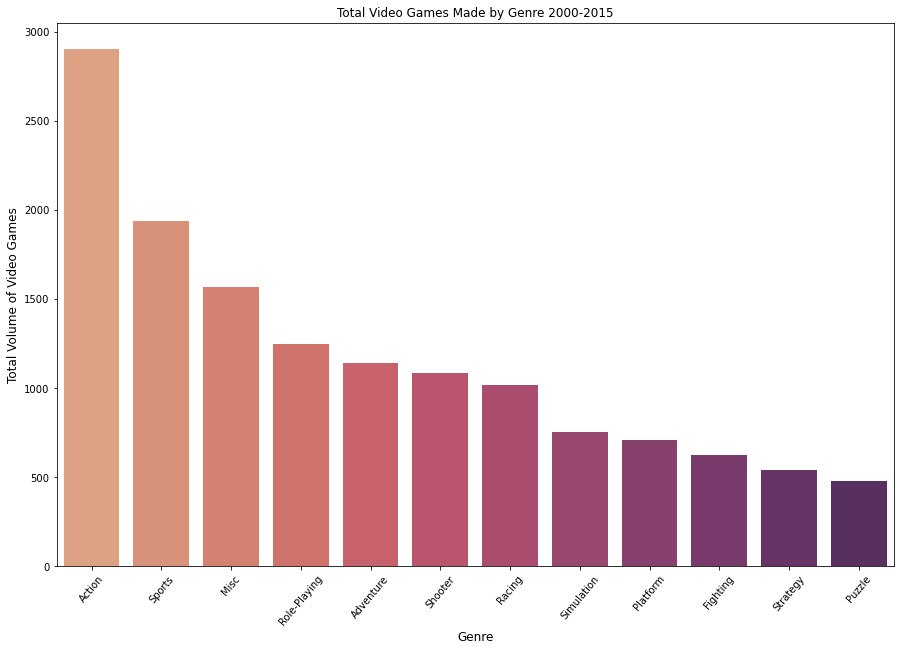

In [32]:
plt.figure(figsize=(15, 10))
fig5 = sns.countplot(x="Genre", data=vgsales, order = vgsales['Genre'].value_counts().index, palette="flare")
fig5.set_title('Total Video Games Made by Genre 2000-2015')
fig5.set_xlabel(xlabel='Genre', fontsize=12)
fig5.set_ylabel(ylabel='Total Volume of Video Games', fontsize=12)
plt.xticks(rotation=50)
plt.show()

PUBLISHER ANALYSIS

TOP GLOBAL SALES BY PUBLISHER

In [33]:
#LOOKING AT THE VOLUME OF GAMES RELEASED PER PUBLISHER (2000-2015)
top_publisher = vgsales.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).head(10)
top_publisher = pd.DataFrame(top_publisher).reset_index()
top_publisher

,Publisher,Name
0,Electronic Arts,1211
1,Activision,896
2,Ubisoft,885
3,Namco Bandai Games,800
4,Konami Digital Entertainment,690
5,THQ,688
6,Sony Computer Entertainment,522
7,Nintendo,515
8,Sega,506
9,Take-Two Interactive,387


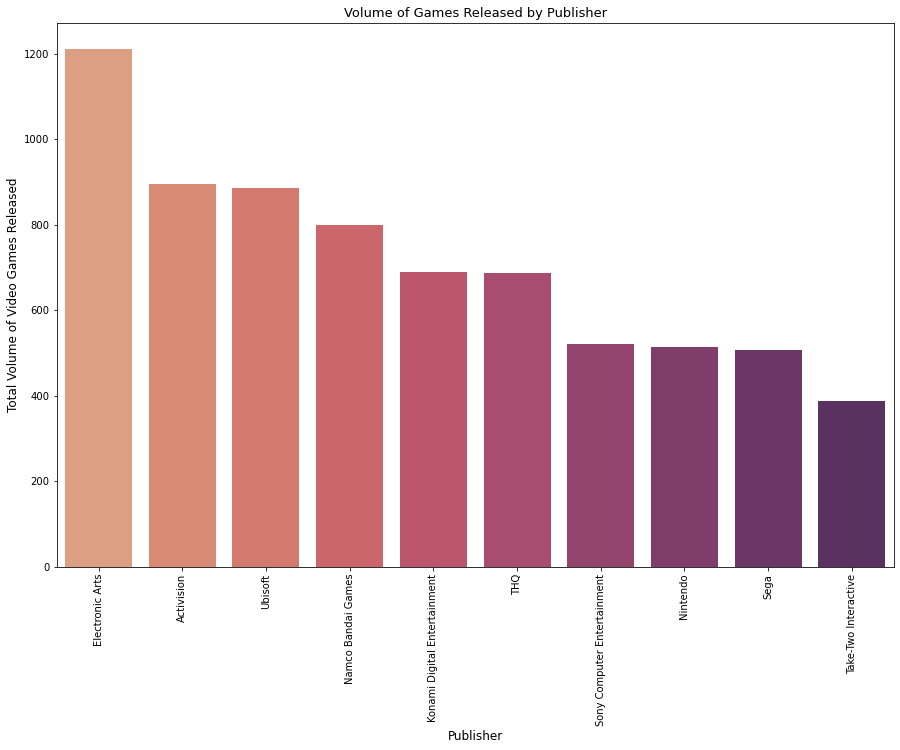

In [34]:
plt.figure(figsize=(15, 10))
fig6 = sns.countplot(x="Publisher", data=vgsales, order = vgsales.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:10].index, palette='flare')
fig6.set_title('Volume of Games Released by Publisher', fontsize=13)
fig6.set_xlabel(xlabel='Publisher', fontsize=12)
fig6.set_ylabel(ylabel='Total Volume of Video Games Released', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [35]:
#WHICH PUBLISHER HAD THE HIGHEST GLOBAL SALES 2000-2015
sale_pbl = vgsales[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()
sale_pbl

,Publisher,Global_Sales
0,Nintendo,1181.48
1,Electronic Arts,996.16
2,Activision,673.43
3,Ubisoft,455.14
4,Sony Computer Entertainment,428.99
5,Take-Two Interactive,386.56
6,THQ,320.73
7,Microsoft Game Studios,239.15
8,Sega,221.80
9,Konami Digital Entertainment,221.44


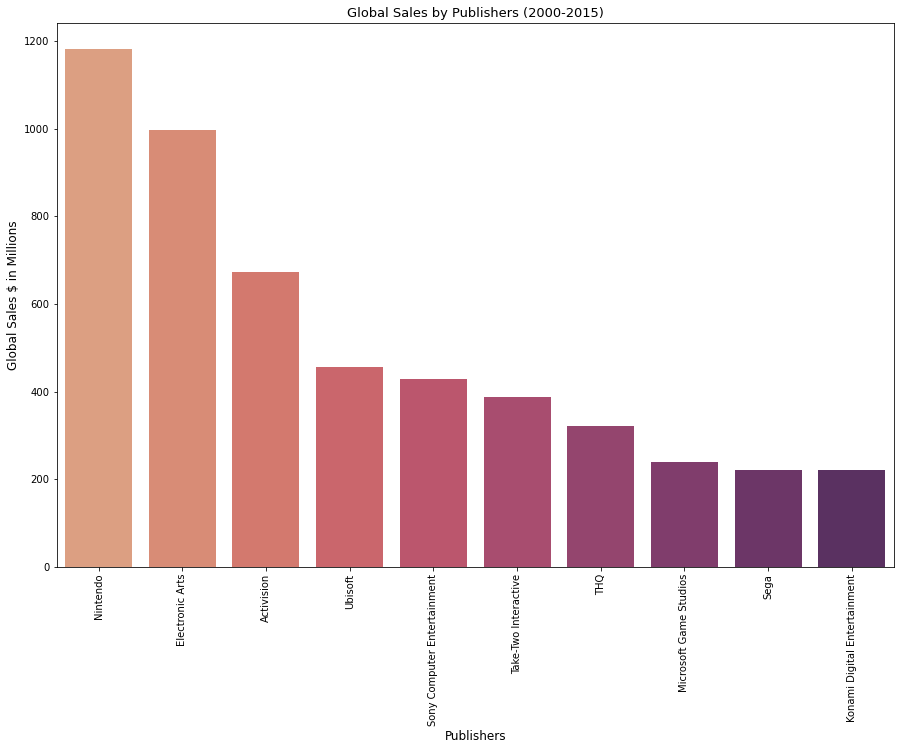

In [36]:
plt.figure(figsize=(15, 10))
fig7 = sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl, palette="flare")
fig7.set_title('Global Sales by Publishers (2000-2015)', fontsize=13)
fig7.set_xlabel(xlabel='Publishers', fontsize=12)
fig7.set_ylabel(ylabel='Global Sales $ in Millions', fontsize=12)
plt.xticks(rotation=90)
plt.show()

WHICH GAME HAD THE HIGHEST SALE PRICE GLOBALLY?

In [37]:
#REVIEWING THE TOP 20 SELLING GAMES BETWEEN 2000-2015
top_game_sale = vgsales.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Global_Sales', 'Publisher', 'Platform']]
top_game_sale = top_game_sale.sort_values(by=['Global_Sales'], ascending=False)
top_game_sale

#NINTENDO SALES FROM TOP 20 = 417.16 WHICH EQUATES TO 35% OF THEIR SALES

,Name,Year,Genre,Global_Sales,Publisher,Platform
0,Wii Sports,2006,Sports,82.74,Nintendo,Wii
2,Mario Kart Wii,2008,Racing,35.82,Nintendo,Wii
3,Wii Sports Resort,2009,Sports,33.00,Nintendo,Wii
6,New Super Mario Bros.,2006,Platform,30.01,Nintendo,DS
7,Wii Play,2006,Misc,29.02,Nintendo,Wii
8,New Super Mario Bros. Wii,2009,Platform,28.62,Nintendo,Wii
10,Nintendogs,2005,Simulation,24.76,Nintendo,DS
11,Mario Kart DS,2005,Racing,23.42,Nintendo,DS
13,Wii Fit,2007,Sports,22.72,Nintendo,Wii
14,Wii Fit Plus,2009,Sports,22.00,Nintendo,Wii


In [38]:
most_successful = pd.DataFrame(columns = ['Name', 'Year', 'Genre', 'Global_Sales', 'Publisher', 'Platform']) #CREATING AN EMPTY DATAFRAME WITH OUR NECESSARY COLUMNS  

for i in range(2000, 2016): #LETTING i CHANGE VALUE FROM 2000-2015
    year_data = vgsales[vgsales['Year'] == i] #SELECTING ALL DATA WHERE THE YEAR = i 
    row = year_data['Global_Sales'].idxmax() #BY USING THE idmax FUNCTION, GETTING THE ROW OF THE HIGHEST GLOBAL SALES VALUE 
    data =pd.DataFrame({'Name': [year_data['Name'][row]], 'Year': [year_data['Year'][row]], 'Genre': [year_data['Genre'][row]], 'Global_Sales': [year_data['Global_Sales'][row]], 'Publisher': [year_data['Publisher'][row]], 'Platform': [year_data['Platform'][row]]}) #SELECTING ALL DATA FROM THAT ROW AND PUTTING IT INTO A DATAFRAME
    most_successful = pd.concat([most_successful, data]) #CONCATING THAT DATAFRAME TO OUR most_successful DATAFRAME 
    
most_successful

,Name,Year,Genre,Global_Sales,Publisher,Platform
0,Pokémon Crystal Version,2000,Role-Playing,6.39,Nintendo,GB
0,Gran Turismo 3: A-Spec,2001,Racing,14.98,Sony Computer Entertainment,PS2
0,Grand Theft Auto: Vice City,2002,Action,16.15,Take-Two Interactive,PS2
0,Need for Speed Underground,2003,Racing,7.2,Electronic Arts,PS2
0,Grand Theft Auto: San Andreas,2004,Action,20.81,Take-Two Interactive,PS2
0,Nintendogs,2005,Simulation,24.76,Nintendo,DS
0,Wii Sports,2006,Sports,82.74,Nintendo,Wii
0,Wii Fit,2007,Sports,22.72,Nintendo,Wii
0,Mario Kart Wii,2008,Racing,35.82,Nintendo,Wii
0,Wii Sports Resort,2009,Sports,33.0,Nintendo,Wii


GAME OF THE YEAR ANALYSIS

In [39]:
#WHEN RESEARCHING WINNERS FOR GAME OF THE YEAR I WAS UNABLE TO FIND A COMPLETE, RELIABLE DATASET - I DECIDED TO CREATE A DICTIONARY WITH INFORMATION FOUND ONLINE AND CREATE A PANDAS DATAFRAME.

data = {'Name': ['Halo: Combat Evolved', 'Battlefield 1942','Star Wars: Knights of the Old Republic', 'Half-Life 2', 'God of War', 'Okami', 'Super Mario Galaxy', 'Fallout 3', 'Unchartered 2: Among Theives', 'Mass Effect 2', 'Portal 2', 'Journey', 'The Last of Us', 'Dragon Age:Inquisition', 'The Witcher 3: Wild Hunt', 'Overwatch', 'The Legend of Zelda: Breath of the Wild', 'God of War(2018)', 'Control', 'Hades', 'Forza Horizon'],
        'Year': ['2001', '2002', '2003', '2004','2005' ,'2006' , '2007','2008' ,'2009' ,'2010' ,'2011' ,'2012' ,'2013' , '2014', '2015','2016' , '2017','2018' , '2019','2020' ,'2021'],
        'Genre': ['Shooter', 'Shooter', 'Role-Playing', 'Shooter', 'Action', 'Action', 'Platform', 'Action', 'Action', 'Action', 'Puzzle', 'Adventure', 'Action', 'Action', 'Action', 'Shooter', 'Action', 'Action', 'Action', 'Action', 'Racing'],
        'Platform': ['XB', 'PC', 'PC', 'PC', 'PS2', 'PS2', 'Wii', 'PS3', 'PS3', 'X360', 'PC', 'PS3', 'PS3', 'PS4', 'PC', 'PC', 'WiiU', 'PS4', 'PC', 'PC', 'XONE'],
        'Publisher': ['Bungie', 'Digital Illusions CE', 'BioWare', 'Valve Corporation', 'SCE Snata Monica Studio', 'Clover Studio', 'Nintendo', 'Bethesda', 'Naughty Dog', 'BioWare', 'Valve Corporate', 'TheGameCompany', 'Naughty Dog', 'BioWare', 'CD Projekt Red', 'Blizzard Entertainment', 'Nintendo', 'SIE SAnta Monica Studio', 'Remedy Entertainment', 'Supergiant Games', 'Playground Games']}
goty_winners = pd.DataFrame(data)
goty_winners

,Name,Year,Genre,Platform,Publisher
0,Halo: Combat Evolved,2001,Shooter,XB,Bungie
1,Battlefield 1942,2002,Shooter,PC,Digital Illusions CE
2,Star Wars: Knights of the Old Republic,2003,Role-Playing,PC,BioWare
3,Half-Life 2,2004,Shooter,PC,Valve Corporation
4,God of War,2005,Action,PS2,SCE Snata Monica Studio
5,Okami,2006,Action,PS2,Clover Studio
6,Super Mario Galaxy,2007,Platform,Wii,Nintendo
7,Fallout 3,2008,Action,PS3,Bethesda
8,Unchartered 2: Among Theives,2009,Action,PS3,Naughty Dog
9,Mass Effect 2,2010,Action,X360,BioWare


In [40]:
#CREATED A FUNCTION THAT ALLOWS US TO UPDATE THE GOTY LIST WITH NEW WINNERS IN A USER-FRIENDLY WAY

def addGame(data): 
    Name = input('What is the Name of the Game')
    Year = input('When did the game win GOTY?')
    Genre = input('What is the Genre of the game?')
    Platform = input('What is the original Platform of the Game?')
    Publisher = input('Who was the Publisher of this Game?')

    new_goty = pd.DataFrame({'Name': [Name], 'Year': [Year], 'Genre':[Genre], 'Platform':[Platform], 'Publisher':[Publisher]})

    new_data = data.append(new_goty, ignore_index = True)
    return new_data

#goty_winners = addGame(goty_winners)
#goty_winners

In [41]:

def determine_winner(dataframe):
    
    year = input('What year would you like to know IGNs Game of the Year (GOTY) for? (2001-2021): ') # Ask for an input from the user, the variable year will be a string.

    while not year.isdigit(): # Checking if the string is an integer by using the isdigit() method.
        year = input('Invalid Input, choose a year between 2001 and 2021: ') # If the string is not an integer we ask for another input.
    year = int(year) # Cast the string into an integer.

    while year > 2021 or year < 2001: # Check if the integer is between the boundaries.
        year = input('Invalid Input, choose a year between 2001 and 2021: ') # If it's not the case, ask for another input (will be a string again).
        while not year.isdigit(): # Checking if the string is an integer by using the isdigit() method.
            year = input('Ivalid Input, choose a year between 2001 and 2021: ') #If the string is not an integer we ask for another input.
        year = int(year)# Cast the string into an integer.

    for i, e in enumerate(dataframe['Year']): # Iterate over the column Year, with i being the row and e the current element
        if int(e) == year: # If the element equals to the user given year
            print('The Game of the Year in '+  str(year) + ' was ' + dataframe['Name'][i] + '. This game falls into the ' + dataframe['Genre'][i] 
            +' genre and it was originally released on the ' + dataframe['Platform'][i] + ' platform!') # Print the year (integer cast into a string) and the name of the game (string). The + is to concatenate the string

#IN THEORY WE CAN USE THIS PIECE OF CODE TO CHECK WHICH WAS THE GAME OF THE YEAR WHEN ANALYSING SALES FROM PARTICULAR YEARS TO SEE IF THE GAME OF THE YEAR AND TOP SALES HAVE ANY CORRELATION. 

In [42]:
determine_winner(goty_winners)

The Game of the Year in 2012 was Journey. This game falls into the Adventure genre and it was originally released on the PS3 platform!
